Public Leaderboard Score: 0.6521 Private Leaderboard Score 0.5367

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['y_train.csv', 'sample_submission.csv', 'X_train.csv', 'X_test.csv']


# Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
train=pd.read_csv('../input/X_train.csv')
test=pd.read_csv('../input/X_test.csv')
y=pd.read_csv('../input/y_train.csv')

In [4]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [5]:
print('No. of series in training data: ',train['series_id'].nunique())
print('No. of series in testing data: ',test['series_id'].nunique())

No. of series in training data:  3810
No. of series in testing data:  3816


In [6]:
train.groupby('series_id')['measurement_number'].count()

series_id
0       128
1       128
2       128
3       128
4       128
5       128
6       128
7       128
8       128
9       128
10      128
11      128
12      128
13      128
14      128
15      128
16      128
17      128
18      128
19      128
20      128
21      128
22      128
23      128
24      128
25      128
26      128
27      128
28      128
29      128
       ... 
3780    128
3781    128
3782    128
3783    128
3784    128
3785    128
3786    128
3787    128
3788    128
3789    128
3790    128
3791    128
3792    128
3793    128
3794    128
3795    128
3796    128
3797    128
3798    128
3799    128
3800    128
3801    128
3802    128
3803    128
3804    128
3805    128
3806    128
3807    128
3808    128
3809    128
Name: measurement_number, Length: 3810, dtype: int64

In [7]:
(len(train)==128*3810)

True

Each series has 128 measurement values in training data

In [8]:
test.groupby('series_id')['measurement_number'].count()

series_id
0       128
1       128
2       128
3       128
4       128
5       128
6       128
7       128
8       128
9       128
10      128
11      128
12      128
13      128
14      128
15      128
16      128
17      128
18      128
19      128
20      128
21      128
22      128
23      128
24      128
25      128
26      128
27      128
28      128
29      128
       ... 
3786    128
3787    128
3788    128
3789    128
3790    128
3791    128
3792    128
3793    128
3794    128
3795    128
3796    128
3797    128
3798    128
3799    128
3800    128
3801    128
3802    128
3803    128
3804    128
3805    128
3806    128
3807    128
3808    128
3809    128
3810    128
3811    128
3812    128
3813    128
3814    128
3815    128
Name: measurement_number, Length: 3816, dtype: int64

In [9]:
(len(test)==3816*128)

True

Each Series in test data also has 128 measurement values

In [10]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [11]:
y.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [12]:
print(len(y)); print(y['surface'].unique()); y['surface'].nunique()

3810
['fine_concrete' 'concrete' 'soft_tiles' 'tiled' 'soft_pvc'
 'hard_tiles_large_space' 'carpet' 'hard_tiles' 'wood']


9

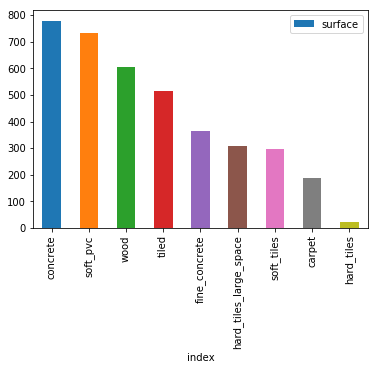

In [13]:
y['surface'].value_counts().reset_index().plot(x='index',y='surface',kind='bar')

In [14]:
def plot_series_distribution(series):
    df_train=train[train['series_id']==series]
    df_test=test[test['series_id']==series]
    plt.figure(figsize=(30,15))
    for i,col in enumerate(df_train.columns[3:]):
        plt.subplot(3,4,i+1)
        df_train[col].hist(bins=100,color='blue')
        df_test[col].hist(bins=100,color='red')
        plt.title(col)

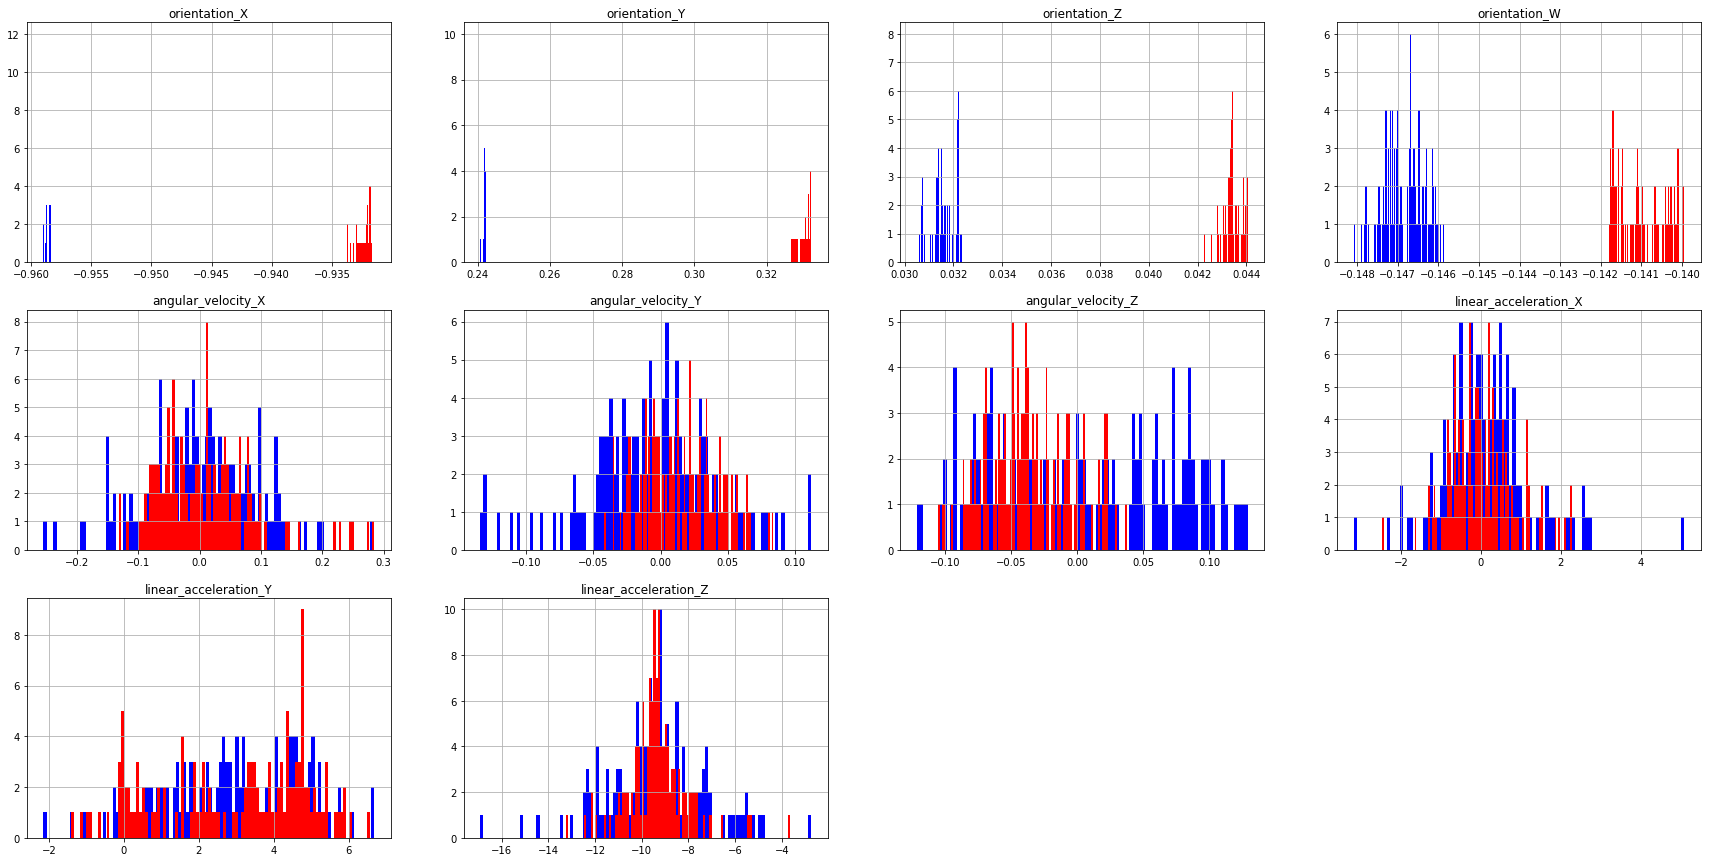

In [15]:
plot_series_distribution(1)

In [16]:
def plot_series(series):
    df_train=train[train['series_id']==series]
    df_test=test[test['series_id']==series]
    plt.figure(figsize=(30,15))
    for i,col in enumerate(df_train.columns[3:]):
        plt.subplot(3,4,i+1)
        df_train[col].plot(color='blue')
        #df_test[col].hist(color='red')
        plt.title(col)
       

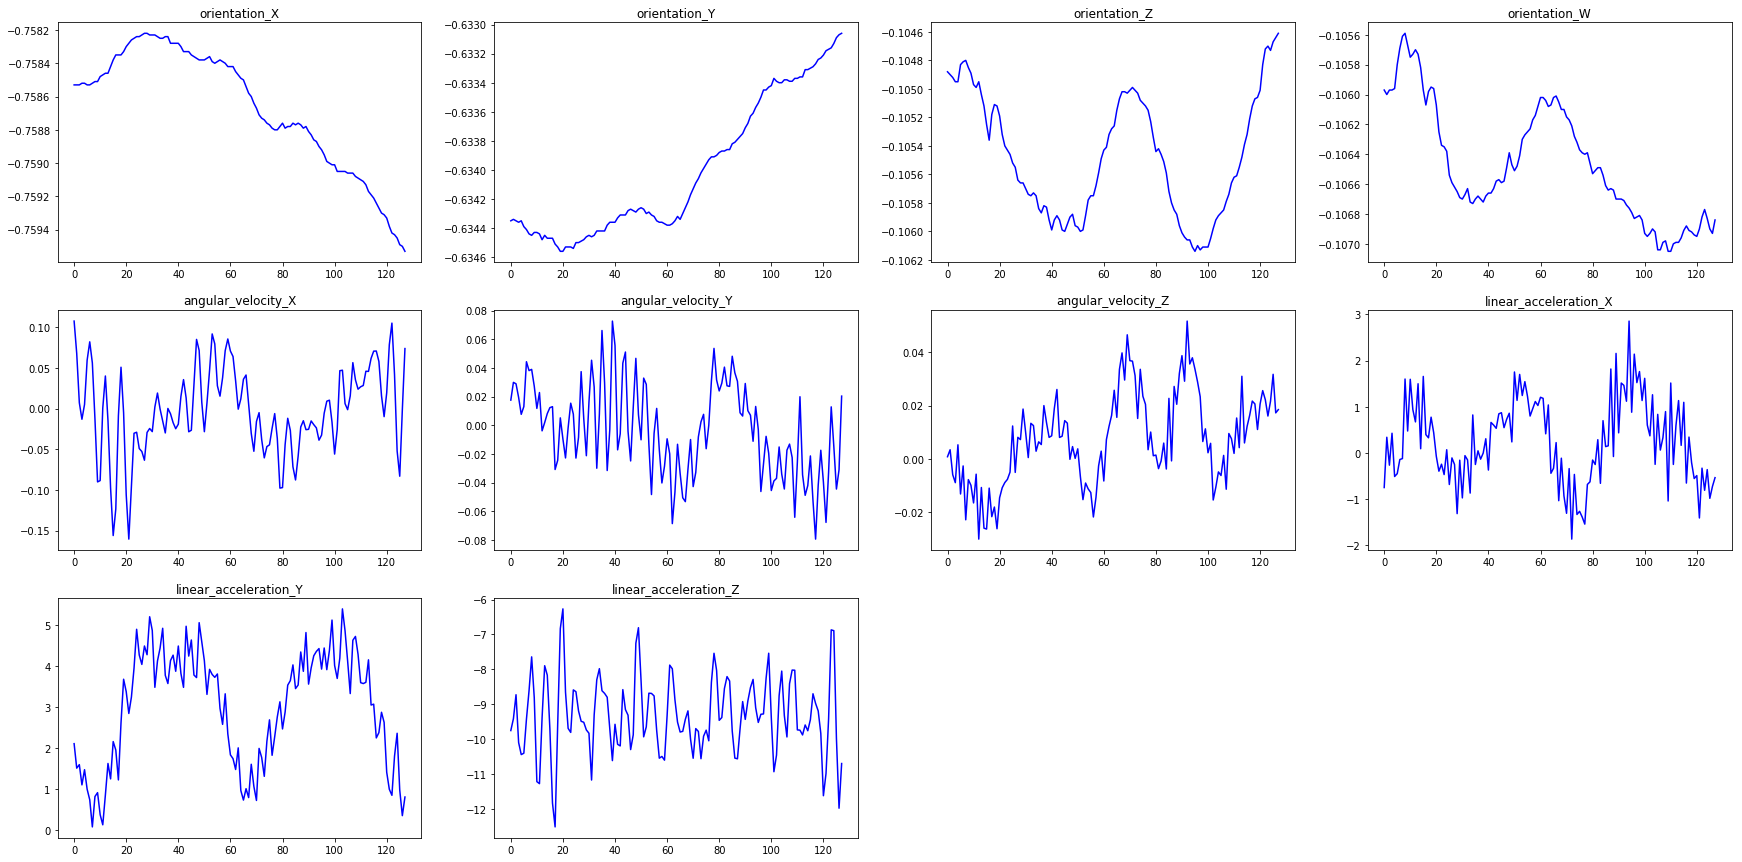

In [17]:
plot_series(0)

# Feature Engineering

In [18]:
train_df=train[['series_id']].drop_duplicates().reset_index(drop=True)

In [25]:

test_df=test[['series_id']].drop_duplicates().reset_index(drop=True)

In [19]:
import numpy as np
def new_features(df,tf):
    for i,col in enumerate(df.columns[3:]):
        tf[col+'_mean']=df.groupby('series_id')[col].mean()
        tf[col+'_std']=df.groupby('series_id')[col].std()
        tf[col+'_max']=df.groupby('series_id')[col].max()
        tf[col+'_min']=df.groupby('series_id')[col].min()
        tf[col + '_max_to_min'] = tf[col + '_max'] / tf[col + '_min']
        tf[col+'_abs_max']=df.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        tf[col+'_abs_min']=df.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))
        tf[col+'_mad']=df.groupby('series_id')[col].mad()
        tf[col+'_kurtosis']=df.groupby('series_id')[col].apply(lambda x: x.kurtosis())
        tf[col+'_skew']=df.groupby('series_id')[col].skew()
        tf[col+'_median']=df.groupby('series_id')[col].median()
        tf[col+'_rolling_avg_10']=df.groupby('series_id')[col].rolling(10).mean().mean(skipna=True)
        tf[col+'_rolling_avg_10']=df.groupby('series_id')[col].rolling(10).std().mean(skipna=True)
    return tf

In [20]:
train_df=new_features(train,train_df)

In [27]:
test_df=new_features(test,test_df)

In [28]:
test_df.head()

,series_id,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_abs_max,orientation_X_abs_min,orientation_X_mad,orientation_X_kurtosis,orientation_X_skew,orientation_X_median,orientation_X_rolling_avg_10,orientation_Y_mean,orientation_Y_std,orientation_Y_max,orientation_Y_min,orientation_Y_max_to_min,orientation_Y_abs_max,orientation_Y_abs_min,orientation_Y_mad,orientation_Y_kurtosis,orientation_Y_skew,orientation_Y_median,orientation_Y_rolling_avg_10,orientation_Z_mean,orientation_Z_std,orientation_Z_max,orientation_Z_min,orientation_Z_max_to_min,orientation_Z_abs_max,orientation_Z_abs_min,orientation_Z_mad,orientation_Z_kurtosis,orientation_Z_skew,orientation_Z_median,orientation_Z_rolling_avg_10,orientation_W_mean,orientation_W_std,orientation_W_max,...,linear_acceleration_Z_kurtosis_kurtosis,linear_acceleration_Z_kurtosis_skew,linear_acceleration_Z_kurtosis_median,linear_acceleration_Z_kurtosis_rolling_avg_10,linear_acceleration_Z_skew_mean,linear_acceleration_Z_skew_std,linear_acceleration_Z_skew_max,linear_acceleration_Z_skew_min,linear_acceleration_Z_skew_max_to_min,linear_acceleration_Z_skew_abs_max,linear_acceleration_Z_skew_abs_min,linear_acceleration_Z_skew_mad,linear_acceleration_Z_skew_kurtosis,linear_acceleration_Z_skew_skew,linear_acceleration_Z_skew_median,linear_acceleration_Z_skew_rolling_avg_10,linear_acceleration_Z_median_mean,linear_acceleration_Z_median_std,linear_acceleration_Z_median_max,linear_acceleration_Z_median_min,linear_acceleration_Z_median_max_to_min,linear_acceleration_Z_median_abs_max,linear_acceleration_Z_median_abs_min,linear_acceleration_Z_median_mad,linear_acceleration_Z_median_kurtosis,linear_acceleration_Z_median_skew,linear_acceleration_Z_median_median,linear_acceleration_Z_median_rolling_avg_10,linear_acceleration_Z_rolling_avg_10_mean,linear_acceleration_Z_rolling_avg_10_std,linear_acceleration_Z_rolling_avg_10_max,linear_acceleration_Z_rolling_avg_10_min,linear_acceleration_Z_rolling_avg_10_max_to_min,linear_acceleration_Z_rolling_avg_10_abs_max,linear_acceleration_Z_rolling_avg_10_abs_min,linear_acceleration_Z_rolling_avg_10_mad,linear_acceleration_Z_rolling_avg_10_kurtosis,linear_acceleration_Z_rolling_avg_10_skew,linear_acceleration_Z_rolling_avg_10_median,linear_acceleration_Z_rolling_avg_10_rolling_avg_10
0,0,-0.025810,0.000284,-0.025156,-0.026418,0.952230,0.026418,0.025156,0.000238,-0.690757,-0.389316,-0.025748,0.000375,-0.988644,0.000039,-0.98854,-0.98873,0.999808,0.98873,0.98854,0.000033,-0.490712,0.203751,-0.988645,0.000352,-0.148006,0.000253,-0.147480,-0.148720,0.991662,0.148720,0.147480,0.000214,-0.456746,-0.165049,-0.148010,0.000166,0.003147,0.000233,0.003609,...,6.217582,2.296739,0.024022,1.072088,-0.038264,0.252257,0.733515,-0.805242,-0.910925,0.805242,0.000078,0.184240,1.349583,0.125357,-0.040768,0.240909,-9.347705,0.150330,-8.61225,-9.83060,0.876066,9.83060,8.61225,0.103652,5.021389,0.823818,-9.363150,0.1426,1.886526,0.0,1.886526,1.886526,1.0,1.886526,1.886526,6.217249e-15,0,0,1.886526,0.0
1,1,-0.932288,0.000564,-0.931480,-0.933720,0.997601,0.933720,0.931480,0.000481,-0.393465,-0.763507,-0.932115,0.000375,0.330271,0.001654,0.33227,0.32661,1.017330,0.33227,0.32661,0.001389,-0.663179,-0.691798,0.330815,0.000352,0.043416,0.000326,0.044053,0.042283,1.041861,0.044053,0.042283,0.000230,1.232789,-0.337195,0.043395,0.000166,-0.140968,0.000601,-0.139940,...,4.155650,1.792053,0.075613,1.072088,-0.003352,0.255578,1.101847,-0.838662,-1.313816,1.101847,0.000180,0.187953,2.834533,0.310346,0.001827,0.240909,-9.363488,0.122719,-8.99525,-9.75515,0.922103,9.75515,8.99525,0.087336,1.658759,-0.020481,-9.365650,0.1426,1.886526,0.0,1.886526,1.886526,1.0,1.886526,1.886526,6.217249e-15,0,0,1.886526,0.0
2,2,-0.230186,0.001054,-0.227130,-0.231410,0.981505,0.231410,0.227130,0.000876,-0.208219,0.935914,-0.230600,0.000375,0.961448,0.000260,0.96217,0.96109,1.001124,0.96217,0.96109,0.000213,-0.255195,0.882054,0.961360,0.000352,0.144340,0.0

In [29]:
new_train=train_df.copy()
new_test=test_df.copy()

In [30]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 6.5MB/s ta 0:00:01
    100% |████████████████████████████████| 496.4MB 67kB/s  eta 0:00:01  4% |█▋                              | 24.7MB 55.3MB/s eta 0:00:09    20% |██████▍                         | 99.5MB 51.3MB/s eta 0:00:08    23% |███████▋                        | 118.3MB 19.6MB/s eta 0:00:20    73% |███████████████████████▌        | 365.0MB 20.4MB/s eta 0:00:07    73% |███████████████████████▋        | 365.8MB 19.6MB/s eta 0:00:07    73% |███████████████████████▋        | 366.3MB 21.5MB/s eta 0:00:07    75% |████████████████████████▎       | 376.0MB 48.4MB/s eta 0:00:03    87% |████████████████████████████    | 433.2MB 47.3MB/s eta 0:00:02


  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: fastai 1.0.51
    Uninstalling fastai-1.0.51:
      Successfully uninstalled fastai-1.0.51
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [33]:
new_train['surface']=y['surface']

train_cats() function converts categorical features into codes. In the present dataset the 'surface' column is a categorical feature

In [34]:
train_cats(new_train)

In [35]:
df_train,y,nas=proc_df(new_train,'surface')
df_test,_,nas=proc_df(new_test,na_dict=nas)
df_train,y,nas=proc_df(new_train,'surface',na_dict=nas)

Function for Calculating RMSE and R2 score

In [36]:
def rmse(x,y):
    return np.sqrt(((x-y)**2).mean())
def print_score(m):
    res=[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):
        res.append(m.oob_score_)
    print(res)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y, test_size = 0.2, random_state = 42)

In [38]:
m=RandomForestClassifier(n_estimators=120,min_samples_leaf=5,max_features=0.5,oob_score=True,n_jobs=-1)
m.fit(X_train,y_train)
pred=m.predict(X_valid)
print_score(m)

[0.7261067215834108, 1.5180454348461438, 0.963254593175853, 0.8713910761154856, 0.8638451443569554]


In [39]:
m=RandomForestClassifier(n_estimators=200,min_samples_leaf=5,max_features=0.5,oob_score=True,n_jobs=-1)
m.fit(X_train,y_train)
pred=m.predict(X_valid)
#print(accuracy_score(y_valid,pred))
print_score(m)

[0.7135729477117506, 1.4848314414265409, 0.9655511811023622, 0.8753280839895013, 0.8661417322834646]


# Feature Importance

<Figure size 1152x1152 with 0 Axes>

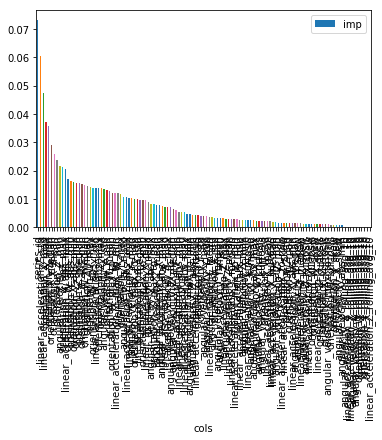

In [43]:
plt.figure(figsize=(16,16))
fi=rf_feat_importance(m,df_train)
fi.plot(kind='bar',x='cols',y='imp')
df_k=fi[fi['imp']>=0.005]['cols'] # We'll keep features having feature importance value greater than 0.005

In [44]:
len(df_k)

54

There are 54 features having importance value greater than 0.005

In [45]:
df_keep=df_train[df_k]
df_keep_test=df_test[df_k]

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size = 0.2, random_state = 42)
X_train.shape

(3048, 54)

In [47]:
m=RandomForestClassifier(n_estimators=200,min_samples_leaf=5,max_features=0.5,oob_score=True,n_jobs=-1)
m.fit(X_train,y_train)
pred=m.predict(X_valid)
print_score(m)

[0.7786521769046981, 1.376594756404215, 0.9606299212598425, 0.8884514435695539, 0.8736876640419947]


The scores are not affected much by dropping those features

# Removing Redundant features

In [48]:
from scipy.cluster import hierarchy as hc

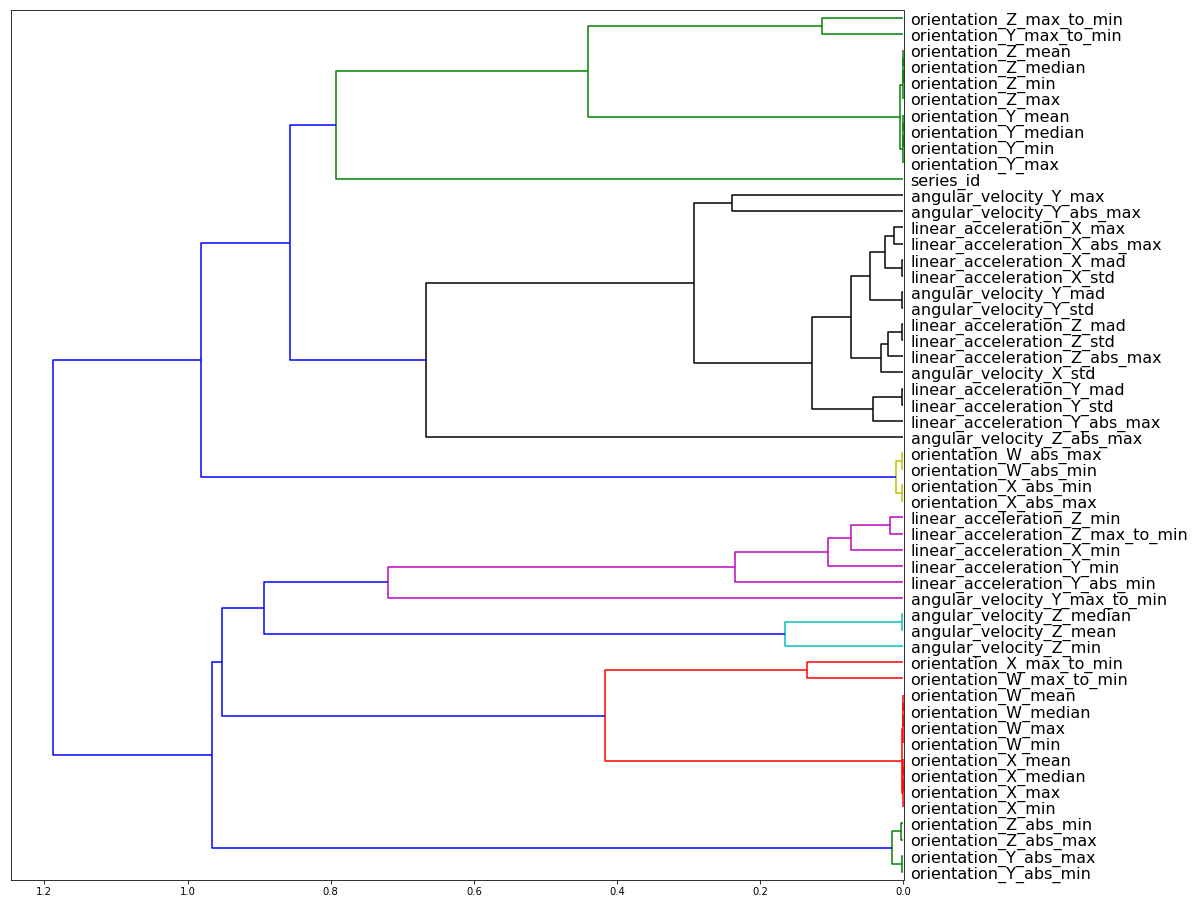

In [49]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,16))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [50]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
    X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size = 0.2, random_state = 42)
    m.fit(X_train, y_train)
    return m.oob_score_

In [51]:
get_oob(df_keep)

0.8753280839895013

In [52]:
a=['orientation_Z_mean','orientation_Z_median','orientation_Z_min','orientation_Z_max','orientation_Y_mean','orientation_Y_median','orientation_Y_min','orientation_Y_max','orientation_X_mean','orientation_X_median','orientation_X_min','orientation_X_max','orientation_W_mean','orientation_W_median','orientation_W_min','orientation_W_max']

The features in 'a' are correlated. Hence we will drop each feature one by one and check whether the score is affected by dropping them.

In [53]:
for c in a:
    print(c,get_oob(df_keep.drop(c,axis=1)))

orientation_Z_mean 0.8707349081364829
orientation_Z_median 0.8776246719160105
orientation_Z_min 0.8759842519685039
orientation_Z_max 0.8746719160104987
orientation_Y_mean 0.8730314960629921
orientation_Y_median 0.8704068241469817
orientation_Y_min 0.8723753280839895
orientation_Y_max 0.8756561679790026
orientation_X_mean 0.8727034120734908
orientation_X_median 0.8723753280839895
orientation_X_min 0.8713910761154856
orientation_X_max 0.8704068241469817
orientation_W_mean 0.8727034120734908
orientation_W_median 0.8717191601049868
orientation_W_min 0.8700787401574803
orientation_W_max 0.8727034120734908


In [54]:
to_drop=['orientation_Z_mean','orientation_Z_median','orientation_Y_mean','orientation_Y_median','orientation_X_mean','orientation_X_median','orientation_W_mean','orientation_W_median']

In [55]:
get_oob(df_keep.drop(to_drop, axis=1))

0.8769685039370079

The score does not change on dropping the features in to_drop list.

In [56]:
df_keep.drop(to_drop, axis=1, inplace=True)
df_keep_test.drop(to_drop,axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Cross Validation 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=546789)
sub_preds_rf = np.zeros((df_keep_test.shape[0], 9))
oof_preds_rf = np.zeros((df_keep.shape[0]))
score = 0
for i, (train_index, test_index) in enumerate(folds.split(df_keep, y)):
    print('-'*20, i, '-'*20)
    
    clf =  RandomForestClassifier(n_estimators = 200, n_jobs = -1)
    clf.fit(df_keep.iloc[train_index], y[train_index])
    oof_preds_rf[test_index] = clf.predict(df_keep.iloc[test_index])
    sub_preds_rf += clf.predict_proba(df_keep_test) / folds.n_splits
    score += clf.score(df_keep.iloc[test_index], y[test_index])
    print('score ', clf.score(df_keep.iloc[test_index], y[test_index]))
    

-------------------- 0 --------------------
score  0.9033942558746736
-------------------- 1 --------------------
score  0.9163398692810457
-------------------- 2 --------------------
score  0.9094488188976378
-------------------- 3 --------------------
score  0.9131578947368421
-------------------- 4 --------------------
score  0.9101717305151915


In [58]:
sub_preds_rf

array([[0.008, 0.002, 0.067, ..., 0.   , 0.117, 0.007],
       [0.488, 0.259, 0.08 , ..., 0.116, 0.018, 0.011],
       [0.006, 0.011, 0.148, ..., 0.   , 0.641, 0.178],
       ...,
       [0.   , 0.408, 0.044, ..., 0.001, 0.021, 0.01 ],
       [0.267, 0.389, 0.021, ..., 0.   , 0.038, 0.269],
       [0.057, 0.008, 0.008, ..., 0.006, 0.003, 0.896]])

In [59]:
sub_preds_rf.argmax(axis=1)

array([4, 0, 7, ..., 1, 1, 8])

In [60]:
new_train['surface'].cat.codes.unique()

array([2, 1, 6, 7, 5, 4, 0, 3, 8])

In [61]:
new_train['surface'].cat.categories

Index(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled', 'wood'],
      dtype='object')

In [62]:
s={0:'carpet',1:'concrete',2:'fine_concrete',3:'hard_tiles',4:'hard_tiles_large_space',5:'soft_pvc',6:'soft_tiles',7:'tiled',8:'wood'}


In [63]:
df_sub=pd.DataFrame({'series_id':df_test['series_id'],'predictions':sub_preds_rf.argmax(axis=1)})

In [64]:
df_sub['surface']=df_sub['predictions'].apply(lambda x: s[x])

In [65]:
df_sub.drop(['predictions'],axis=1,inplace=True)

Saving Submission File

In [66]:
df_sub.to_csv('submission2_cv.csv',index=False)

# References
1. fastai course by Jeremy Howard

2. https://www.kaggle.com/prashantkikani/help-humanity-by-helping-robots

3. https://www.kaggle.com/artgor/where-do-the-robots-drive